In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fname = '../data/881001.WI.xlsx'

In [3]:
df = pd.read_excel(fname)

In [4]:
df.head()

,close
2000-01-04,1031.0334
2000-01-05,1034.4385
2000-01-06,1076.5120
2000-01-07,1117.7781
2000-01-10,1141.0309


In [6]:
df['return'] = df['close'].pct_change()

# 计算波动率锥

In [8]:
ks = range(20, 500, 10)
vdf = pd.DataFrame(index=df.index)

In [12]:
for look_back in ks:
    vdf['%d days vol'%(look_back)] = df['return'].rolling(window=look_back).std() * np.sqrt(243)

In [14]:
today = df.index[-1]

In [23]:
vol_df = pd.DataFrame({'days': ks, 
                        'vol': vdf.loc[today].values,
                        'max': vdf.max(axis=0).values, 
                        'min': vdf.min(axis=0).values,
                        'median': vdf.median(axis=0).values,
                        'percent_75': vdf.quantile(0.75, axis=0).values,
                        'percent_25': vdf.quantile(0.25, axis=0).values})

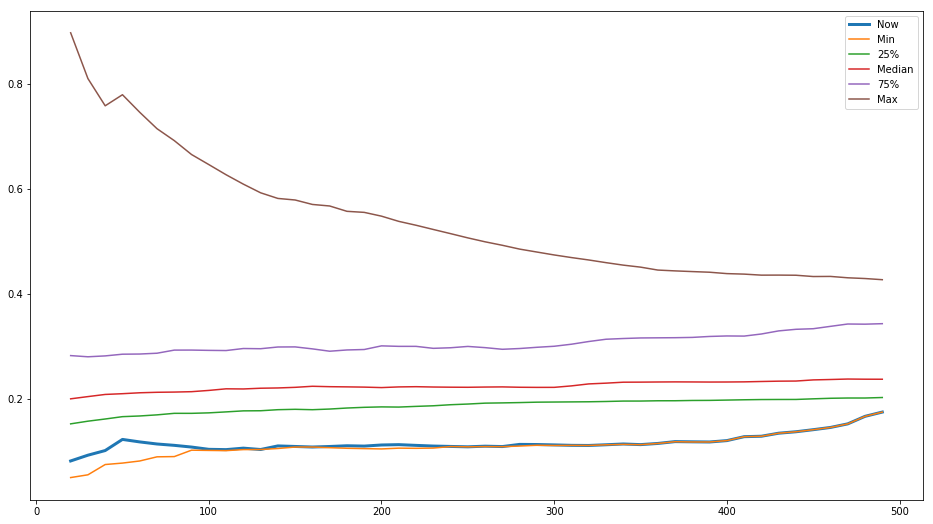

In [37]:
plt.figure(figsize=(16, 9))
plt.plot(vol_df['days'], vol_df['vol'], linewidth=3, label='Now')
plt.plot(vol_df['days'], vol_df['min'], label='Min')
plt.plot(vol_df['days'], vol_df['percent_25'], label='25%')
plt.plot(vol_df['days'], vol_df['median'], label='Median')
plt.plot(vol_df['days'], vol_df['percent_75'], label='75%')
plt.plot(vol_df['days'], vol_df['max'], label='Max')
plt.legend()